# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
count = len(cities)
count

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_data = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print('Beginning Data Retrieval     ')
print('-----------------------------')
n = 1
for city_name in cities: #city_names:
    print(f'Processing Record {n} of {count} | {city_name}')
    n = n+1
    try:
        response = requests.get(query_url + city_name).json()
        lattitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        temperature = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        weather_results = []
        items = [city_name, lattitude, longitude, temperature, humidity, cloudiness, wind_speed, country, date]
        for item in items:
            weather_results.append(item)
        weather_data.append(weather_results)
    except Exception:
        print(f'{city_name} not found. Skipping...')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of 645 | pathein
Processing Record 2 of 645 | taolanaro
taolanaro not found. Skipping...
Processing Record 3 of 645 | ushuaia
Processing Record 4 of 645 | cabo san lucas
Processing Record 5 of 645 | kapaa
Processing Record 6 of 645 | mataura
Processing Record 7 of 645 | halalo
halalo not found. Skipping...
Processing Record 8 of 645 | port augusta
Processing Record 9 of 645 | nanortalik
Processing Record 10 of 645 | karratha
Processing Record 11 of 645 | puerto ayora
Processing Record 12 of 645 | east london
Processing Record 13 of 645 | ponta do sol
Processing Record 14 of 645 | avarua
Processing Record 15 of 645 | dikson
Processing Record 16 of 645 | novyy urengoy
Processing Record 17 of 645 | hobart
Processing Record 18 of 645 | faanui
Processing Record 19 of 645 | mattru
Processing Record 20 of 645 | tanda
Processing Record 21 of 645 | chokurdakh
Processing Record 22 of 645 | belushya guba
belushya guba

Processing Record 194 of 645 | lavrentiya
Processing Record 195 of 645 | methoni
Processing Record 196 of 645 | mokhsogollokh
Processing Record 197 of 645 | mazyr
Processing Record 198 of 645 | bolshiye uki
bolshiye uki not found. Skipping...
Processing Record 199 of 645 | cape town
Processing Record 200 of 645 | puerto ayacucho
Processing Record 201 of 645 | rio gallegos
Processing Record 202 of 645 | arman
Processing Record 203 of 645 | fairlie
Processing Record 204 of 645 | lagoa
Processing Record 205 of 645 | hithadhoo
Processing Record 206 of 645 | oum hadjer
Processing Record 207 of 645 | ngunguru
Processing Record 208 of 645 | ruatoria
ruatoria not found. Skipping...
Processing Record 209 of 645 | bandarbeyla
Processing Record 210 of 645 | vestmanna
Processing Record 211 of 645 | sandwick
Processing Record 212 of 645 | margate
Processing Record 213 of 645 | zaozhuang
Processing Record 214 of 645 | egvekinot
Processing Record 215 of 645 | tura
Processing Record 216 of 645 | dando

Processing Record 388 of 645 | sinkat
sinkat not found. Skipping...
Processing Record 389 of 645 | wulanhaote
wulanhaote not found. Skipping...
Processing Record 390 of 645 | flinders
Processing Record 391 of 645 | tabuk
Processing Record 392 of 645 | inta
Processing Record 393 of 645 | yarmouth
Processing Record 394 of 645 | ganzhou
Processing Record 395 of 645 | yarkovo
Processing Record 396 of 645 | labuan
Processing Record 397 of 645 | channel-port aux basques
Processing Record 398 of 645 | camacha
Processing Record 399 of 645 | reefton
reefton not found. Skipping...
Processing Record 400 of 645 | san policarpo
Processing Record 401 of 645 | tocopilla
Processing Record 402 of 645 | teahupoo
Processing Record 403 of 645 | high level
Processing Record 404 of 645 | fort saint james
Processing Record 405 of 645 | saleaula
saleaula not found. Skipping...
Processing Record 406 of 645 | mareeba
Processing Record 407 of 645 | lolua
lolua not found. Skipping...
Processing Record 408 of 645 

Processing Record 577 of 645 | anyang
Processing Record 578 of 645 | zorgo
Processing Record 579 of 645 | kupang
Processing Record 580 of 645 | artyk
artyk not found. Skipping...
Processing Record 581 of 645 | tahe
Processing Record 582 of 645 | port hardy
Processing Record 583 of 645 | ust-bolsheretsk
ust-bolsheretsk not found. Skipping...
Processing Record 584 of 645 | oyama
Processing Record 585 of 645 | arlit
Processing Record 586 of 645 | tubruq
tubruq not found. Skipping...
Processing Record 587 of 645 | gulshat
gulshat not found. Skipping...
Processing Record 588 of 645 | ostersund
Processing Record 589 of 645 | yanan
yanan not found. Skipping...
Processing Record 590 of 645 | bambanglipuro
Processing Record 591 of 645 | la asuncion
Processing Record 592 of 645 | kirakira
Processing Record 593 of 645 | pringsewu
Processing Record 594 of 645 | atambua
Processing Record 595 of 645 | mandali
Processing Record 596 of 645 | merauke
Processing Record 597 of 645 | vokhtoga
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = pd.DataFrame(weather_data,columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
city_data.to_csv(output_data_file)
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pathein,16.78,94.73,81.14,87,100,9.24,MM,1602907431
1,ushuaia,-54.80,-68.30,41.00,94,20,19.46,AR,1602907431
2,cabo san lucas,22.89,-109.91,82.99,79,0,4.43,MX,1602907317
3,kapaa,22.08,-159.32,80.60,78,40,8.05,US,1602907432
4,mataura,-46.19,168.86,57.00,59,76,1.99,NZ,1602907255
...,...,...,...,...,...,...,...,...,...
586,ayan,56.45,138.17,39.33,67,68,2.66,RU,1602907504
587,cairns,-16.92,145.77,86.00,48,3,13.87,AU,1602907270
588,shubarkuduk,49.14,56.49,53.26,41,76,11.23,KZ,1602907504
589,barcelona,41.39,2.16,52.00,70,20,12.75,ES,1602907207


In [7]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.648883,21.222047,59.852809,72.248731,53.913706,8.048409,1.602907e+09
std,33.778080,91.261581,19.949167,20.982496,39.158015,5.765045,6.896194e+01
min,-54.800000,-179.170000,1.710000,10.000000,0.000000,0.290000,1.602907e+09
25%,-8.375000,-55.210000,44.010000,60.500000,11.500000,3.830000,1.602907e+09
50%,23.080000,25.680000,62.600000,77.000000,64.000000,6.930000,1.602907e+09
75%,50.975000,103.760000,77.380000,88.000000,90.000000,10.290000,1.602907e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,42.460000,1.602908e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
c_d = city_data[city_data['Humidity'] > 100]
print(f'There are {len(c_d)} cities that have humidity over 100%')
city_data = city_data[city_data['Humidity'] <= 100]
city_data.describe()

There are 0 cities that have humidity over 100%


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.648883,21.222047,59.852809,72.248731,53.913706,8.048409,1.602907e+09
std,33.778080,91.261581,19.949167,20.982496,39.158015,5.765045,6.896194e+01
min,-54.800000,-179.170000,1.710000,10.000000,0.000000,0.290000,1.602907e+09
25%,-8.375000,-55.210000,44.010000,60.500000,11.500000,3.830000,1.602907e+09
50%,23.080000,25.680000,62.600000,77.000000,64.000000,6.930000,1.602907e+09
75%,50.975000,103.760000,77.380000,88.000000,90.000000,10.290000,1.602907e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,42.460000,1.602908e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
indices = list(c_d.index.values)
print(indices)
print(f'There are {len(indices)} cities that have humidity over 100%')

[]
There are 0 cities that have humidity over 100%


In [12]:
# Make a new DataFrame called "clean_city_data" equal to the city data to drop all humidity outliers by index.
clean_city_data = city_data[city_data['Humidity'] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pathein,16.78,94.73,81.14,87,100,9.24,MM,1602907431
1,ushuaia,-54.80,-68.30,41.00,94,20,19.46,AR,1602907431
2,cabo san lucas,22.89,-109.91,82.99,79,0,4.43,MX,1602907317
3,kapaa,22.08,-159.32,80.60,78,40,8.05,US,1602907432
4,mataura,-46.19,168.86,57.00,59,76,1.99,NZ,1602907255
...,...,...,...,...,...,...,...,...,...
586,ayan,56.45,138.17,39.33,67,68,2.66,RU,1602907504
587,cairns,-16.92,145.77,86.00,48,3,13.87,AU,1602907270
588,shubarkuduk,49.14,56.49,53.26,41,76,11.23,KZ,1602907504
589,barcelona,41.39,2.16,52.00,70,20,12.75,ES,1602907207


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

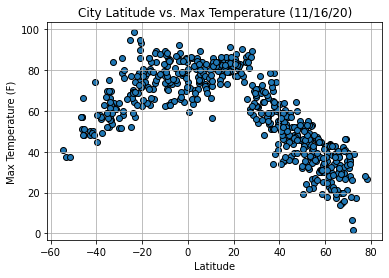

In [13]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Max Temperature (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

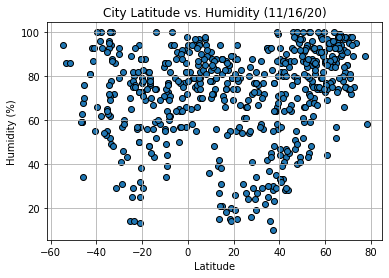

In [14]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Humidity (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

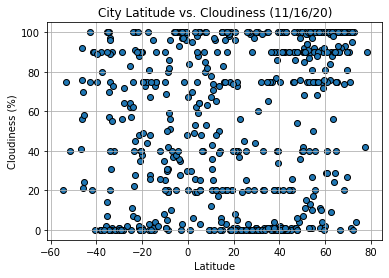

In [15]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Cloudiness (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

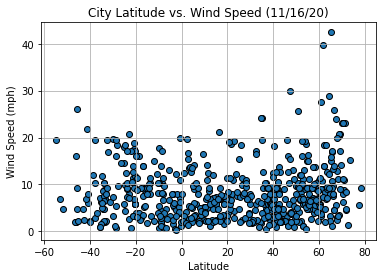

In [16]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'], marker='o', edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed (11/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression